In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import re
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df["size"] = df["size"].astype(str).apply(lambda s: (s.split()[0]))
df["size"] = df["size"].astype(np.number)

df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Sq. Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Acres', '').str.replace('Cents', '').str.replace('Perch', '')
df['total_sqft'] = df['total_sqft'].str.replace('Grounds', '').str.replace('Sq. Meter', '').str.replace('Guntha','')
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Yards', '').str.replace('Meter', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Yards', '').str.replace('Meter', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq.', '').str.replace('Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Acres', '').str.replace('Cents', '')
df['total_sqft'] = df['total_sqft'].str.replace('Grounds', '').str.replace('Meter', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Sq. Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq.', '').str.replace('Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Acres', '').str.replace('Cents', '')
df['total_sqft'] = df['total_sqft'].str.replace('Grounds', '').str.replace('Meter', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Sq. Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Sq.', '').str.replace('Yards', '')
df['total_sqft'] = df['total_sqft'].str.replace('Acres', '').str.replace('Cents', '')
df['total_sqft'] = df['total_sqft'].str.replace('Grounds', '').str.replace('Meter', '')


split_values = df['total_sqft'].str.split('-', n=1, expand=True)


# Convert the split values to floats, excluding non-numeric values
numeric_values = split_values.apply(pd.to_numeric, errors='coerce')

# Calculate the average of the numeric values in the range
df['total_sqft'] = numeric_values.mean(axis=1)


df["size"]=df["size"].fillna(df['size'].mean())
df["balcony"]=df["balcony"].fillna(df['balcony'].mean())
df["bath"]=df["bath"].fillna(df["size"])
# Checking for non string types
for i in df["total_sqft"]:
    if(not isinstance(i,str)):
        print(type(i))



# Checking for NaN 
for i in df["total_sqft"]:
    if(not isinstance(i,float)):
        print(type(i))

df["size"] = df["size"].apply(lambda x: 0 if(not isinstance(x,float)) else x )
# df.to_excel("out.xlsx")

C:\Users\Priyanshi Tiwari\AppData\Local\Temp\ipykernel_65528\2287534862.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_sqft'] = df['total_sqft'].str.replace('Sq. Meter', '').str.replace('Sq. Yards', '')
C:\Users\Priyanshi Tiwari\AppData\Local\Temp\ipykernel_65528\2287534862.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_sqft'] = df['total_sqft'].str.replace('Grounds', '').str.replace('Sq. Meter', '').str.replace('Guntha','')
C:\Users\Priyanshi Tiwari\AppData\Local\Temp\ipykernel_65528\2287534862.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['total_sqft'] = df['total_sqft'].str.replace('Sq. Yards', '').str.replace('Meter', '')
C:\Users\Priyanshi Tiwari\AppData\Local\Temp\ipykernel_65528\2287534862.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df[

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

In [3]:
categorical=len(df.select_dtypes(include=['object']).columns)
numbers=len(df.select_dtypes(include=['float64','int64']).columns)
print("Total number of Categorical Data is:",categorical)
print("Total number of Numerical Data is:",numbers)
print("Total Features are:",categorical+numbers)

Total number of Categorical Data is: 4
Total number of Numerical Data is: 5
Total Features are: 9


C:\Users\Priyanshi Tiwari\AppData\Local\Temp\ipykernel_65528\1426279770.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],color='salmon')


<Axes: xlabel='price', ylabel='Density'>

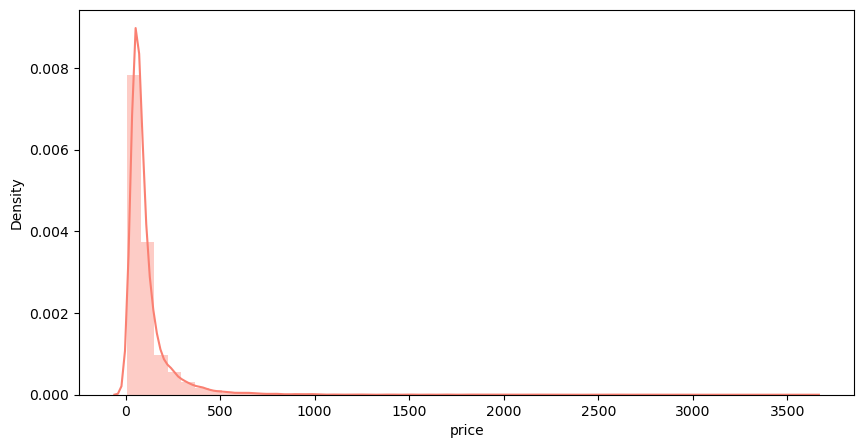

In [4]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'],color='salmon')

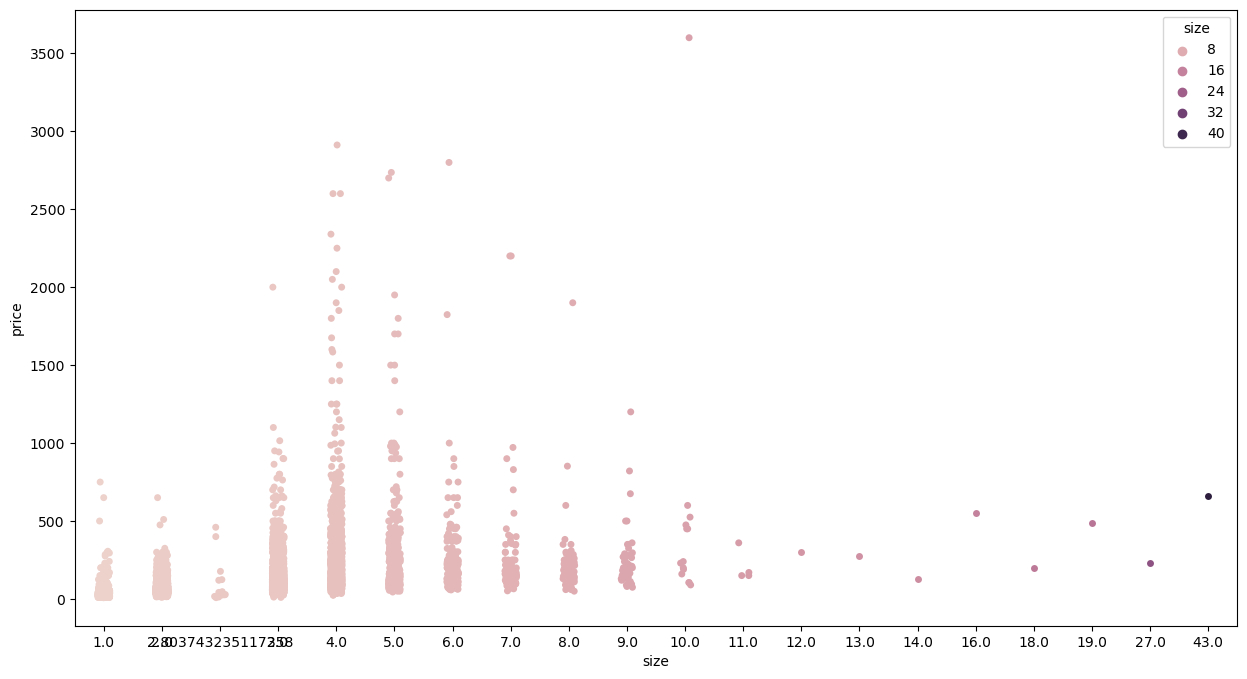

In [5]:
plt.figure(figsize=(15,8))
sns.stripplot(x=df['size'],y=df['price'],hue=df['size'])
plt.show()


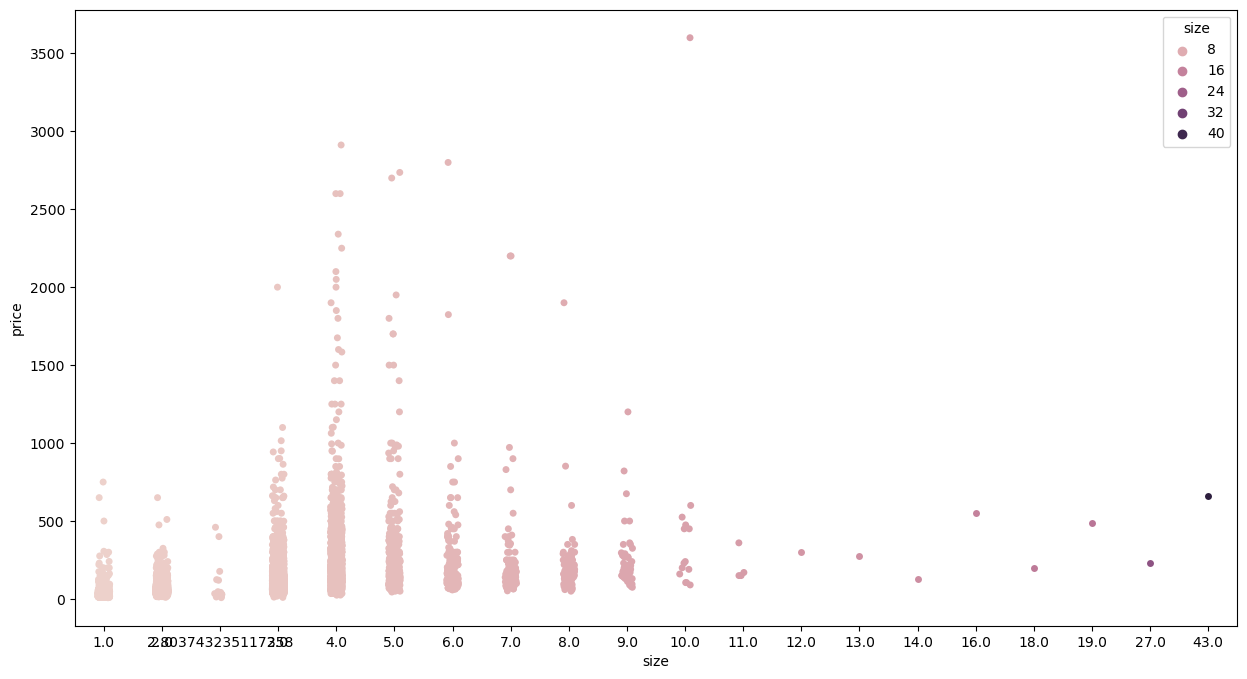

In [6]:
plt.figure(figsize=(15,8))
sns.stripplot(x=df['size'],y=df['price'],hue=df['size'])
plt.show()

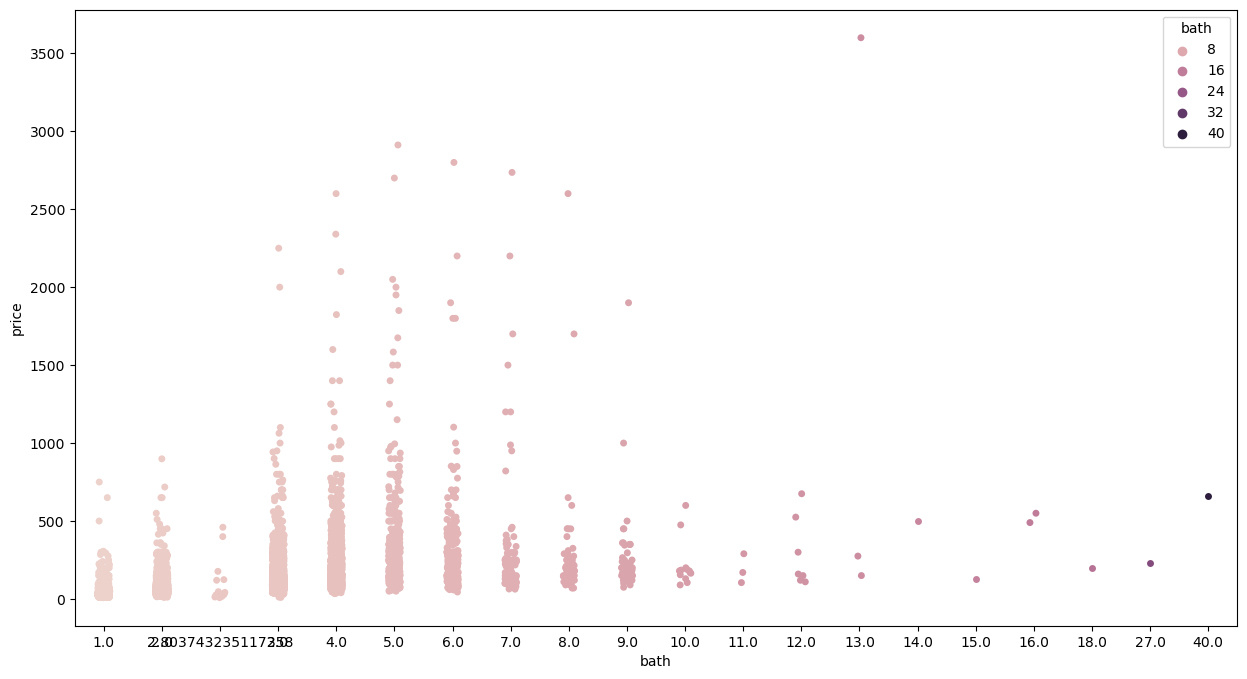

In [7]:
plt.figure(figsize=(15,8))
sns.stripplot(x=df['bath'],y=df['price'],hue=df['bath'])
plt.show()


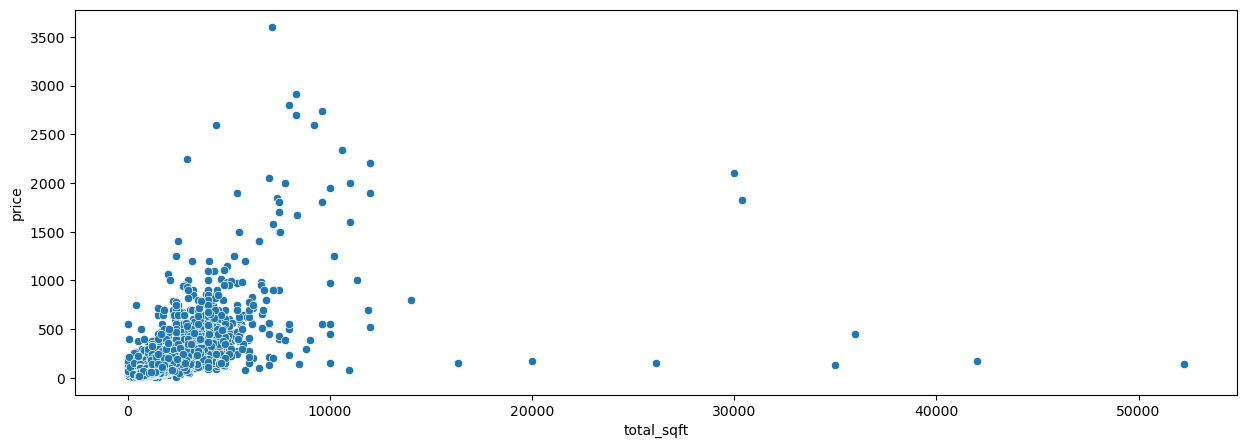

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,y='price',x='total_sqft')
plt.show()

In [9]:
# Removing Outliers 
train = df.drop(df[(df['price']>1500) 
                         & (df['size']>11)].index).reset_index(drop=True)

In [10]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [11]:
train.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [12]:
train = train.drop("society", axis=1)

In [13]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


<Axes: >

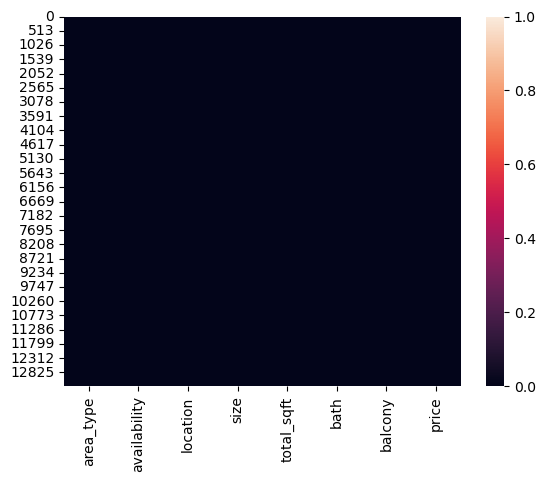

In [14]:
sns.heatmap(train.isnull())

In [15]:
inputval = train['area_type'].values.reshape(-1,1)
oe = OrdinalEncoder(categories=[['Super built-up  Area','Built-up  Area','Plot  Area','Carpet  Area']])
train.drop(["area_type", "availability", "location"], axis=1, inplace= True)
train['area_type'] = oe.fit_transform(inputval)
train.head()

,size,total_sqft,bath,balcony,price,area_type
0,2.0,1056.0,2.0,1.0,39.07,0.0
1,4.0,2600.0,5.0,3.0,120.00,2.0
2,3.0,1440.0,2.0,3.0,62.00,1.0
3,3.0,1521.0,3.0,1.0,95.00,0.0
4,2.0,1200.0,2.0,1.0,51.00,0.0


In [17]:
X = train.drop('price', axis=1)

y = train['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [18]:

# Make predictions on the test data
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

# Model evaluation
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 0.26585798638481567
Mean Squared Error: 0.14254247832254932
Root Mean Squared Error: 0.3775479814838762
R^2 Score: 0.7129333358030985


In [19]:
warnings.filterwarnings(action='ignore')

In [20]:
kfold = KFold(n_splits=10, random_state = 77, shuffle = True)

In [21]:
# LightGBM Grid Search
params = {
    'task' : 'train',
    'objective' : 'regression',
    'subsample' : 0.8,
    'max_depth' : 7
}

param_grid = {
    'learning_rate': [0.1],
    'feature_fraction' : [0.5, 0.8],
    'num_leaves':[31, 63, 127]
}

lgbm_model = lgbm.LGBMRegressor(**params, verbose=-1)

lgbm_grid  = GridSearchCV(lgbm_model, 
                          param_grid, 
                          cv=kfold, 
                          scoring='neg_mean_squared_error', 
                          return_train_score=True)

lgbm_grid.fit(x_train, y_train)

r2_score(lgbm_grid.predict(x_train), y_train)

lgbm_model.fit(x_train,y_train)

LGBMRegressor(max_depth=7, objective='regression', subsample=0.8, task='train',
              verbose=-1)

In [22]:
predictions =lgbm_model.predict(x_test)
lgbm_model.score(x_test, y_test)

0.7434269114917124